In [1]:
# 主成分分析(PCA)とは？
# 多変量の情報を少量の主成分と呼ばれる合成変数で記述し、情報の縮約、次元削減を目的とした手法
# 主成分は分散最大化+直行化により、固有値と固有ベクトルで求まる
# データ単位が揃っている場合には、分散共分散行列と相関行列のいずれを使用しても良い
# そうでない場合には、単位のばらつきによる影響を避けるために相関行列を使用した方が良い

In [23]:
# 分散共分散行列と相関行列
from sklearn.datasets import load_iris

# irisデータセットの取得
iris = load_iris()
iris_df = pd.DataFrame(
        iris.data,
        columns=iris.feature_names,
    )
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


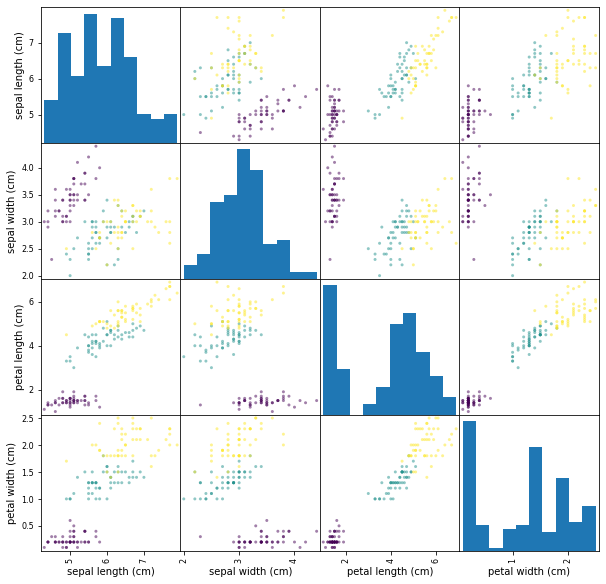

In [27]:
# 散布図行列を描画
import pandas as pd
import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(iris_df, figsize=(10, 10), c=iris.target)
plt.show()

In [25]:
# 分散共分散行列の表示
iris_df.cov()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.685694,-0.042434,1.274315,0.516271
sepal width (cm),-0.042434,0.189979,-0.329656,-0.121639
petal length (cm),1.274315,-0.329656,3.116278,1.295609
petal width (cm),0.516271,-0.121639,1.295609,0.581006


In [26]:
# 相関行列の表示
iris_df.corr().style.background_gradient(axis=None)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [52]:
# 寄与率、主成分得点、主成分負荷量について

# irisデータで主成分分析を実行
import numpy as np
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(iris_df)

PCA()

     contribution_ratio
PC1            0.924619
PC2            0.053066
PC3            0.017103
PC4            0.005212


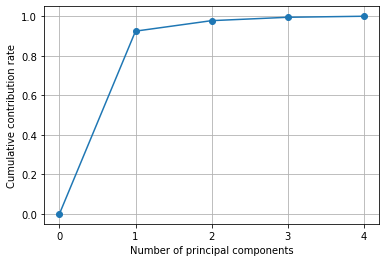

In [53]:
# 寄与率...各主成分をその総和で割ったもの。各主成分がどのくらいの情報を説明できるかという指標
contribution_ratios = pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(iris_df.columns))], columns=["contribution_ratio"])
print(contribution_ratios)

# 累積寄与率を図示する
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list(np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

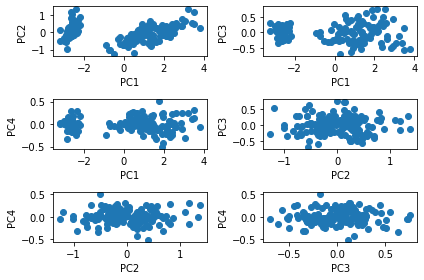

In [64]:
# 主成分得点...データが各主成分の軸上でとる値のこと

# データを主成分に変換
pca_row = pca.transform(iris_df)

# 主成分PC1と主成分PC2についてプロット
fig = plt.figure()

pc_1_2 = fig.add_subplot(3, 2, 1)
pc_1_3 = fig.add_subplot(3, 2, 2)
pc_1_4 = fig.add_subplot(3, 2, 3)
pc_2_3 = fig.add_subplot(3, 2, 4)
pc_2_4 = fig.add_subplot(3, 2, 5)
pc_3_4 = fig.add_subplot(3, 2, 6)

# PC1とPC2
pc_1_2.scatter(pca_row[:, 0], pca_row[:, 1])
pc_1_2.set_xlabel("PC1")
pc_1_2.set_ylabel("PC2")

# PC1とPC3
pc_1_3.scatter(pca_row[:, 0], pca_row[:, 2])
pc_1_3.set_xlabel("PC1")
pc_1_3.set_ylabel("PC3")

# PC1とPC4
pc_1_4.scatter(pca_row[:, 0], pca_row[:, 3])
pc_1_4.set_xlabel("PC1")
pc_1_4.set_ylabel("PC4")

# PC2とPC3
pc_2_3.scatter(pca_row[:, 1], pca_row[:, 2])
pc_2_3.set_xlabel("PC2")
pc_2_3.set_ylabel("PC3")

# PC2とPC4
pc_2_4.scatter(pca_row[:, 1], pca_row[:, 3])
pc_2_4.set_xlabel("PC2")
pc_2_4.set_ylabel("PC4")

# PC3とPC4
pc_3_4.scatter(pca_row[:, 2], pca_row[:, 3])
pc_3_4.set_xlabel("PC3")
pc_3_4.set_ylabel("PC4")

fig.tight_layout() 
plt.show()

In [65]:
# 主成分負荷量...各主成分に対する各変数の影響度合い
# 主成分と元の変数の相関係数と等しい
loadings = pd.DataFrame(pca.components_.T, columns=["PC{}".format(x + 1) for x in range(len(iris_df.columns))], index=iris_df.columns)
loadings

,PC1,PC2,PC3,PC4
sepal length (cm),0.361387,0.656589,-0.582030,-0.315487
sepal width (cm),-0.084523,0.730161,0.597911,0.319723
petal length (cm),0.856671,-0.173373,0.076236,0.479839
petal width (cm),0.358289,-0.075481,0.545831,-0.753657


In [ ]:
# 自己符号化器(autoencoder)について
# ニューラルネットワークモデルを用いて主成分分析と同様の次元圧縮を非線形関数によって行う手法
# 異常検知で用いられることが多い

# keras、pytorch等で実装が必要